# CLEANING THE TRAINING DATA

In [723]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statistics import mean
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [694]:
data = pd.read_csv('train.csv')

In [695]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [696]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,463.000000,466.000000
mean,45.321888,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.954104,1.285408
std,15.697936,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.333646,0.452094
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,85.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [697]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 11 columns):
Age                           466 non-null int64
Gender                        466 non-null object
Total_Bilirubin               466 non-null float64
Direct_Bilirubin              466 non-null float64
Alkaline_Phosphotase          466 non-null int64
Alamine_Aminotransferase      466 non-null int64
Aspartate_Aminotransferase    466 non-null int64
Total_Protiens                466 non-null float64
Albumin                       466 non-null float64
Albumin_and_Globulin_Ratio    463 non-null float64
Dataset                       466 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 40.1+ KB


HANDLE CATEGORICAL DATA - GENDER COLUMN

In [802]:
def gender_female(index):
    if data['Gender'][index] == 'Female':
            return 1
    else:
            return 0

In [699]:
data['Female'] = [gender_female(i) for i in range(len(data['Gender']))]
data.drop('Gender', inplace = True, axis =1)

In [700]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Female
0,60,6.3,3.2,314,118,114,6.6,3.7,1.27,1,0
1,31,0.8,0.2,158,21,16,6.0,3.0,1.00,1,1
2,60,19.6,9.5,466,46,52,6.1,2.0,0.40,1,0
3,34,8.7,4.0,298,58,138,5.8,2.4,0.70,1,0
4,26,0.9,0.2,154,16,12,7.0,3.5,1.00,1,1


HANDLE NULL VALUES - IN Albumin_and_Globulin_Ratio COLUMN

In [704]:
data = data[data['Albumin_and_Globulin_Ratio'].isnull() == False]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 465
Data columns (total 11 columns):
Age                           463 non-null int64
Total_Bilirubin               463 non-null float64
Direct_Bilirubin              463 non-null float64
Alkaline_Phosphotase          463 non-null int64
Alamine_Aminotransferase      463 non-null int64
Aspartate_Aminotransferase    463 non-null int64
Total_Protiens                463 non-null float64
Albumin                       463 non-null float64
Albumin_and_Globulin_Ratio    463 non-null float64
Dataset                       463 non-null int64
Female                        463 non-null int64
dtypes: float64(5), int64(6)
memory usage: 43.4 KB


DEFINING A FUNCTION TO APPLY VARIOUS CLASSIFICATION ALGORITHMS AND PRINT THE ACCURACY SCORES

In [792]:
def classification_scores(X_train,X_test,y_train,y_test):
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred1 = lr.predict(X_test)
    acc1 = metrics.accuracy_score(y_pred1, y_test)
    train_pred1 = lr.predict(X_train)
    train_acc1 = metrics.accuracy_score(train_pred1, y_train)
    print("     LOGISTIC REGRESSION : ")
    print("Test set accuracy: ", acc1, "     Training set accuracy: ", train_acc1)
    cm1 = confusion_matrix(y_test, y_pred1)
    print(cm1)
    accuracies1 = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracies1.mean(), accuracies1.std() * 2))
   
    sv = svm.SVC(kernel='linear', C=1)
    sv.fit(X_train, y_train)
    y_pred2 = sv.predict(X_test)
    acc2 = metrics.accuracy_score(y_pred2, y_test)
    train_pred2 = sv.predict(X_train)
    train_acc2 = metrics.accuracy_score(train_pred2, y_train)
    print("     SUPPORT VECTOR CLASSIFIER : ")
    print("Test set accuracy: ", acc2,"     Training set accuracy: ", train_acc2)
    cm2 = confusion_matrix(y_test, y_pred2)
    print(cm2)
    accuracies2 = cross_val_score(estimator = sv, X = X_train, y = y_train, cv = 10)
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracies2.mean(), accuracies2.std() * 2))
    
    dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    dt.fit(X_train, y_train)
    y_pred3 = dt.predict(X_test)
    acc3 = metrics.accuracy_score(y_pred3, y_test)
    train_pred3 = dt.predict(X_train)
    train_acc3 = metrics.accuracy_score(train_pred3, y_train)
    print("     DECISION TREE : ")
    print("Test set accuracy: ", acc3,"Training set accuracy: ", train_acc3)
    cm3 = confusion_matrix(y_test, y_pred3)
    print(cm3)
    accuracies3 = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracies3.mean(), accuracies3.std() * 2))
    
    rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    rf.fit(X_train, y_train)
    y_pred4 = rf.predict(X_test)
    acc4 = metrics.accuracy_score(y_pred4, y_test)
    train_pred4 = rf.predict(X_train)
    train_acc4 = metrics.accuracy_score(train_pred4, y_train)
    print("     RANDOM FOREST : ", acc4)
    print("Test set accuracy: ", acc4,"     Training set accuracy: ", train_acc4)
    cm4 = confusion_matrix(y_test, y_pred4)
    print(cm4)
    accuracies4 = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracies4.mean(), accuracies4.std() * 2))
    
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred5 = nb.predict(X_test)
    acc5 = metrics.accuracy_score(y_pred5, y_test)
    train_pred5 = nb.predict(X_train)
    train_acc5 = metrics.accuracy_score(train_pred5, y_train)
    print("     NAIVE BAYES : ")
    print("Test set accuracy: ", acc5, "     Training set accuracy: ", train_acc5)
    cm5 = confusion_matrix(y_test, y_pred5)
    print(cm5)
    accuracies5 = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 10)
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracies5.mean(), accuracies5.std() * 2))
    
    
    print("     KNN : ")
    for i in range(2,8):
        classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        y_pred6 = classifier.predict(X_test)
        acc6 = metrics.accuracy_score(y_pred6, y_test)
        train_pred6 = classifier.predict(X_train)
        train_acc6 = metrics.accuracy_score(train_pred6, y_train)
        print(i," : Test set accuracy: ",acc6,"     Training set accuracy: ", train_acc6)
        cm6 = confusion_matrix(y_test, y_pred6)
        print(cm6)
        accuracies6 = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
        print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracies6.mean(), accuracies6.std() * 2))

TRY 1

In [748]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Female
0,60,6.3,3.2,314,118,114,6.6,3.7,1.27,1,0
1,31,0.8,0.2,158,21,16,6.0,3.0,1.00,1,1
2,60,19.6,9.5,466,46,52,6.1,2.0,0.40,1,0
3,34,8.7,4.0,298,58,138,5.8,2.4,0.70,1,0
4,26,0.9,0.2,154,16,12,7.0,3.5,1.00,1,1


In [749]:
X = data.iloc[:, [0,1,2,3,4,5,6,7,8,10]].values
y = data.iloc[:, 9]

In [750]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((330, 10), (110, 10), (330,), (110,))

In [751]:
classification_scores(X_train, X_test, y_train, y_test)

     LOGISTIC REGRESSION : 
Test set accuracy:  0.6636363636363637      Training set accuracy:  0.7181818181818181
[[66 11]
 [26  7]]
Cross Validation Accuracy: 0.71 (+/- 0.11)
     SUPPORT VECTOR CLASSIFIER : 
Test set accuracy:  0.7      Training set accuracy:  0.7121212121212122
[[77  0]
 [33  0]]
Cross Validation Accuracy: 0.69 (+/- 0.05)
     DECISION TREE : 
Test set accuracy:  0.6090909090909091 Training set accuracy:  1.0
[[59 18]
 [25  8]]
Cross Validation Accuracy: 0.63 (+/- 0.14)
     RANDOM FOREST :  0.7090909090909091
Test set accuracy:  0.7090909090909091      Training set accuracy:  0.9757575757575757
[[74  3]
 [29  4]]
Cross Validation Accuracy: 0.71 (+/- 0.09)
     NAIVE BAYES : 
Test set accuracy:  0.5454545454545454      Training set accuracy:  0.5696969696969697
[[28 49]
 [ 1 32]]
Cross Validation Accuracy: 0.58 (+/- 0.14)
     KNN : 
2  : Test set accuracy:  0.5454545454545454      Training set accuracy:  0.8454545454545455
[[65 12]
 [29  4]]
Cross Validation Accur

TRY 2 - AFTER REMOVING OUTLIERS

In [752]:
cols = np.array(data.columns)
cols

array(['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset', 'Female'], dtype=object)

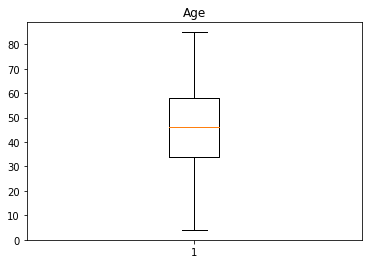

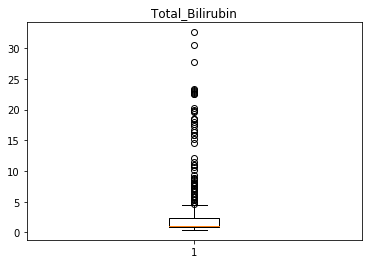

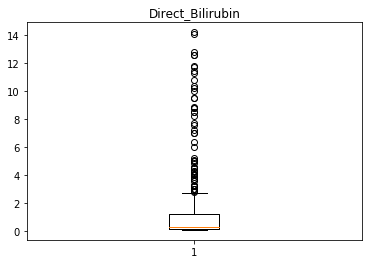

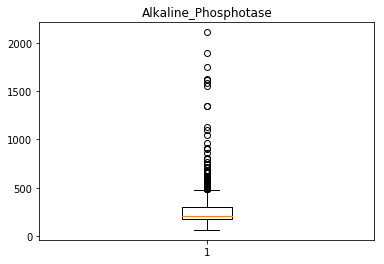

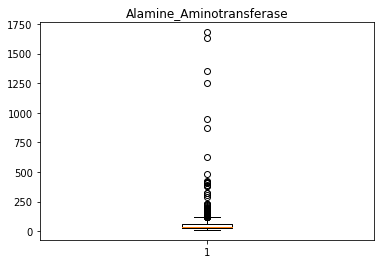

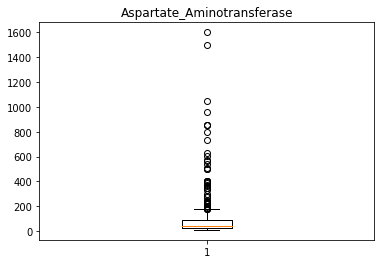

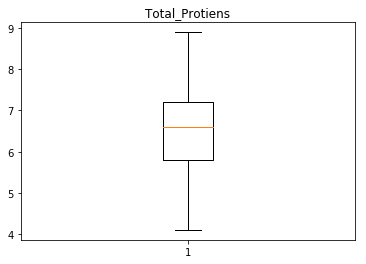

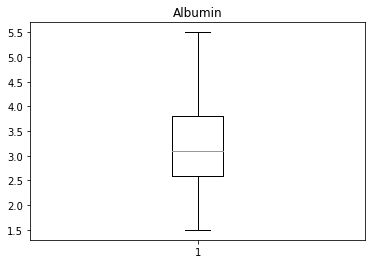

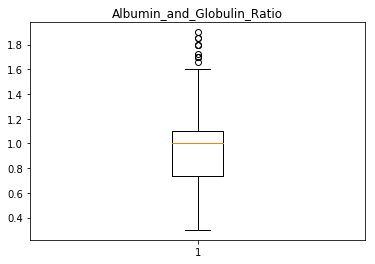

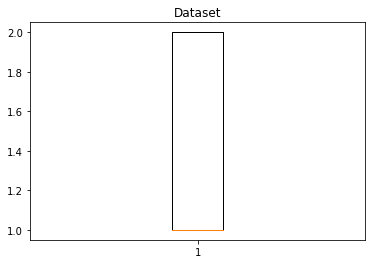

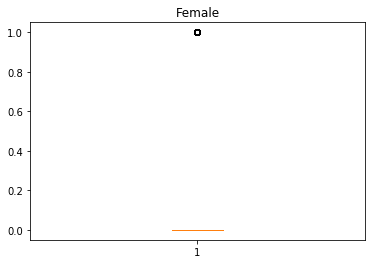

In [753]:
# detecting outliers using boxplots
for i in range(len(cols)):
    plt.boxplot(data[cols[i]])
    plt.title(cols[i])
    plt.show()

In [754]:
data = data[data['Total_Bilirubin'] < 40]
data = data[data['Direct_Bilirubin'] < 15]
data = data[data['Aspartate_Aminotransferase'] < 2000]
data = data[(data['Total_Protiens'] < 9) & (data['Total_Protiens'] > 4)]
data = data[data['Albumin_and_Globulin_Ratio'] < 2.3]
len(data)

440

In [755]:
data.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Female'],
      dtype='object')

In [756]:
X = data.iloc[:, [0,1,2,3,4,5,6,7,8,10]].values
y = data.iloc[:, 9]

In [757]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((330, 10), (110, 10), (330,), (110,))

In [758]:
classification_scores(X_train, X_test, y_train, y_test)

     LOGISTIC REGRESSION : 
Test set accuracy:  0.6636363636363637      Training set accuracy:  0.7181818181818181
[[66 11]
 [26  7]]
Cross Validation Accuracy: 0.71 (+/- 0.11)
     SUPPORT VECTOR CLASSIFIER : 
Test set accuracy:  0.7      Training set accuracy:  0.7121212121212122
[[77  0]
 [33  0]]
Cross Validation Accuracy: 0.69 (+/- 0.05)
     DECISION TREE : 
Test set accuracy:  0.6090909090909091 Training set accuracy:  1.0
[[59 18]
 [25  8]]
Cross Validation Accuracy: 0.63 (+/- 0.14)
     RANDOM FOREST :  0.7090909090909091
Test set accuracy:  0.7090909090909091      Training set accuracy:  0.9757575757575757
[[74  3]
 [29  4]]
Cross Validation Accuracy: 0.71 (+/- 0.09)
     NAIVE BAYES : 
Test set accuracy:  0.5454545454545454      Training set accuracy:  0.5696969696969697
[[28 49]
 [ 1 32]]
Cross Validation Accuracy: 0.58 (+/- 0.14)
     KNN : 
2  : Test set accuracy:  0.5454545454545454      Training set accuracy:  0.8454545454545455
[[65 12]
 [29  4]]
Cross Validation Accur

TRY 3 - REMOVING COLUMNS WITH REDUNDANT INFORMATION

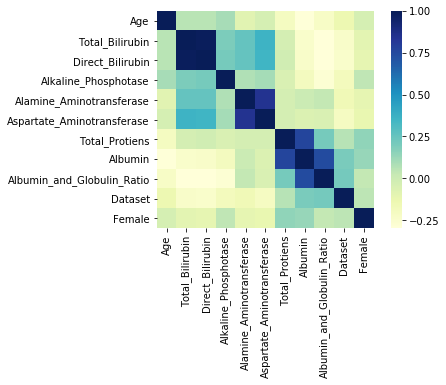

In [761]:
import seaborn as sns
cor = data.corr()
sns.heatmap(cor, square = True, cmap = 'YlGnBu')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [762]:
# Drop direct_bilirubin and aspartate_aminotransferase columns owing to their high correlation with total_bilirubin 
# and alkaline_aminotranferase respectively

In [763]:
data.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Female'],
      dtype='object')

In [764]:
X = data.iloc[:, [0,1,3,5,6,7,8,10]].values
y = data.iloc[:, 9]

In [765]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((330, 8), (110, 8), (330,), (110,))

In [766]:
classification_scores(X_train, X_test, y_train, y_test)

     LOGISTIC REGRESSION : 
Test set accuracy:  0.6636363636363637      Training set accuracy:  0.7181818181818181
[[66 11]
 [26  7]]
Cross Validation Accuracy: 0.70 (+/- 0.12)
     SUPPORT VECTOR CLASSIFIER : 
Test set accuracy:  0.7      Training set accuracy:  0.7121212121212122
[[77  0]
 [33  0]]
Cross Validation Accuracy: 0.71 (+/- 0.01)
     DECISION TREE : 
Test set accuracy:  0.5909090909090909 Training set accuracy:  1.0
[[53 24]
 [21 12]]
Cross Validation Accuracy: 0.65 (+/- 0.07)
     RANDOM FOREST :  0.6454545454545455
Test set accuracy:  0.6454545454545455      Training set accuracy:  0.9727272727272728
[[63 14]
 [25  8]]
Cross Validation Accuracy: 0.66 (+/- 0.08)
     NAIVE BAYES : 
Test set accuracy:  0.5272727272727272      Training set accuracy:  0.5878787878787879
[[29 48]
 [ 4 29]]
Cross Validation Accuracy: 0.60 (+/- 0.15)
     KNN : 
2  : Test set accuracy:  0.5272727272727272      Training set accuracy:  0.8484848484848485
[[65 12]
 [29  4]]
Cross Validation Accur

TRY 4 - ADDING EXTRA COLUMNS

In [776]:
#feature engineering
data2 = data

In [777]:
data2['new1'] = data2['Alkaline_Phosphotase'] * data2['Alamine_Aminotransferase']

In [778]:
data2.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Female,new1
0,60,6.3,3.2,314,118,114,6.6,3.7,1.27,1,0,37052
1,31,0.8,0.2,158,21,16,6.0,3.0,1.00,1,1,3318
2,60,19.6,9.5,466,46,52,6.1,2.0,0.40,1,0,21436
3,34,8.7,4.0,298,58,138,5.8,2.4,0.70,1,0,17284
4,26,0.9,0.2,154,16,12,7.0,3.5,1.00,1,1,2464


In [779]:
data2.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Female', 'new1'],
      dtype='object')

In [783]:
X3 = data2.iloc[:, [0,1,3,4,6,7,8,10,11]].values
y3 = data2.iloc[:, 9].values

In [784]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size = 0.25, random_state = 0)
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((334, 9), (112, 9), (334,), (112,))

In [785]:
classification_scores(X_train, X_test, y_train, y_test)

     LOGISTIC REGRESSION : 
Test set accuracy:  0.6636363636363637      Training set accuracy:  0.7181818181818181
[[66 11]
 [26  7]]
Cross Validation Accuracy: 0.70 (+/- 0.12)
     SUPPORT VECTOR CLASSIFIER : 
Test set accuracy:  0.7      Training set accuracy:  0.7121212121212122
[[77  0]
 [33  0]]
Cross Validation Accuracy: 0.71 (+/- 0.01)
     DECISION TREE : 
Test set accuracy:  0.5909090909090909 Training set accuracy:  1.0
[[53 24]
 [21 12]]
Cross Validation Accuracy: 0.65 (+/- 0.07)
     RANDOM FOREST :  0.6454545454545455
Test set accuracy:  0.6454545454545455      Training set accuracy:  0.9727272727272728
[[63 14]
 [25  8]]
Cross Validation Accuracy: 0.66 (+/- 0.08)
     NAIVE BAYES : 
Test set accuracy:  0.5272727272727272      Training set accuracy:  0.5878787878787879
[[29 48]
 [ 4 29]]
Cross Validation Accuracy: 0.60 (+/- 0.15)
     KNN : 
2  : Test set accuracy:  0.5272727272727272      Training set accuracy:  0.8484848484848485
[[65 12]
 [29  4]]
Cross Validation Accur

In [786]:
#changing test set size
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size = 0.1, random_state = 0)
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((401, 9), (45, 9), (401,), (45,))

In [794]:
classification_scores(X_train, X_test, y_train, y_test)

     LOGISTIC REGRESSION : 
Test set accuracy:  0.6636363636363637      Training set accuracy:  0.7181818181818181
[[66 11]
 [26  7]]
Cross Validation Accuracy: 0.70 (+/- 0.12)
     SUPPORT VECTOR CLASSIFIER : 
Test set accuracy:  0.7      Training set accuracy:  0.7121212121212122
[[77  0]
 [33  0]]
Cross Validation Accuracy: 0.71 (+/- 0.01)
     DECISION TREE : 
Test set accuracy:  0.5909090909090909 Training set accuracy:  1.0
[[53 24]
 [21 12]]
Cross Validation Accuracy: 0.65 (+/- 0.07)
     RANDOM FOREST :  0.6454545454545455
Test set accuracy:  0.6454545454545455      Training set accuracy:  0.9727272727272728
[[63 14]
 [25  8]]
Cross Validation Accuracy: 0.66 (+/- 0.08)
     NAIVE BAYES : 
Test set accuracy:  0.5272727272727272      Training set accuracy:  0.5878787878787879
[[29 48]
 [ 4 29]]
Cross Validation Accuracy: 0.60 (+/- 0.15)
     KNN : 
2  : Test set accuracy:  0.6272727272727273      Training set accuracy:  0.8484848484848485
[[65 12]
 [29  4]]
Cross Validation Accur

# FINAL MODEL

In [841]:
data.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Female', 'new1'],
      dtype='object')

In [845]:
X = data.iloc[:, [0,1,3,5,6,7,8,10]].values
y = data.iloc[:, 9]

In [846]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((329, 8), (110, 8), (329,), (110,))

In [849]:
sv = svm.SVC(kernel='linear', C=1)
sv.fit(X_train, y_train)
y_pred2 = sv.predict(X_test)
acc2 = metrics.accuracy_score(y_pred2, y_test)
train_pred2 = sv.predict(X_train)
train_acc2 = metrics.accuracy_score(train_pred2, y_train)
print("     SUPPORT VECTOR CLASSIFIER : ")
print("Test set accuracy: ", acc2,"     Training set accuracy: ", train_acc2)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracies2 = cross_val_score(estimator = sv, X = X_train, y = y_train, cv = 10)
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracies2.mean(), accuracies2.std() * 2))

     SUPPORT VECTOR CLASSIFIER : 
Test set accuracy:  0.6181818181818182      Training set accuracy:  0.7386018237082067
[[68  0]
 [42  0]]
Cross Validation Accuracy: 0.74 (+/- 0.02)


In [871]:
# logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
acc1 = metrics.accuracy_score(y_pred1, y_test)
train_pred1 = lr.predict(X_train)
train_acc1 = metrics.accuracy_score(train_pred1, y_train)
print("     LOGISTIC REGRESSION : ")
print("Test set accuracy: ", acc1, "     Training set accuracy: ", train_acc1)
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
accuracies1 = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracies1.mean(), accuracies1.std() * 2))

     LOGISTIC REGRESSION : 
Test set accuracy:  0.5909090909090909      Training set accuracy:  0.7598784194528876
[[60  8]
 [37  5]]
Cross Validation Accuracy: 0.74 (+/- 0.14)


# CLEANING THE TESTING DATA

In [850]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00


In [851]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 10 columns):
Age                           117 non-null int64
Gender                        117 non-null object
Total_Bilirubin               117 non-null float64
Direct_Bilirubin              117 non-null float64
Alkaline_Phosphotase          117 non-null int64
Alamine_Aminotransferase      117 non-null int64
Aspartate_Aminotransferase    117 non-null int64
Total_Protiens                117 non-null float64
Albumin                       117 non-null float64
Albumin_and_Globulin_Ratio    116 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 9.2+ KB


In [852]:
d1 = test_data[test_data['Albumin_and_Globulin_Ratio'].isnull() == False]
d1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00


In [853]:
d1 = d1['Albumin_and_Globulin_Ratio']
d1 = np.array(d1)

In [854]:
mean = d1.mean()
mean

0.9189655172413793

In [855]:
test_data[test_data['Albumin_and_Globulin_Ratio'].isnull() == True]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
94,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN


In [856]:
test_data.loc[94,'Albumin_and_Globulin_Ratio'] = mean
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 10 columns):
Age                           117 non-null int64
Gender                        117 non-null object
Total_Bilirubin               117 non-null float64
Direct_Bilirubin              117 non-null float64
Alkaline_Phosphotase          117 non-null int64
Alamine_Aminotransferase      117 non-null int64
Aspartate_Aminotransferase    117 non-null int64
Total_Protiens                117 non-null float64
Albumin                       117 non-null float64
Albumin_and_Globulin_Ratio    117 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 9.2+ KB


In [857]:
def gender_female_test(index):
    if test_data['Gender'][index] == 'Female':
            return 1
    else:
            return 0

In [858]:
test_data['Female'] = [gender_female_test(i) for i in range(len(test_data['Gender']))]
test_data.drop(['Gender'], inplace = True, axis =1)

In [859]:
test_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Female
0,46,0.8,0.2,160,31,40,7.3,3.8,1.10,0
1,15,0.8,0.2,380,25,66,6.1,3.7,1.50,0
2,66,4.2,2.1,159,15,30,7.1,2.2,0.40,1
3,32,0.6,0.1,237,45,31,7.5,4.3,1.34,0
4,60,2.6,1.2,171,42,37,5.4,2.7,1.00,0


In [860]:
test_data.drop(['Direct_Bilirubin','Alamine_Aminotransferase'], inplace=True, axis = 1)

In [861]:
test_data.columns

Index(['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Female'],
      dtype='object')

In [863]:
X = test_data.iloc[:, [0,1,2,3,4,5,6,7]].values

In [865]:
predictions = sv.predict(X)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [869]:
pr = lr.predict(X)
pr

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [873]:
df = pd.DataFrame(pr)
df

,0
0,1
1,1
2,1
3,2
4,1
5,1
6,1
7,1
8,1
9,1


In [877]:
df.to_csv("predictions_question1.csv", sep=",", index = False, header = False)